#**Deployment Solution Architecture**


**Document Overview**

This document outlines the deployment architecture for the Brain Tumor Classifier and SmartFleet Route Optimizer, transitioning the scaled prototypes from Phase 1 into a production environment. The architecture leverages cloud infrastructure to ensure scalability, reliability, and maintainability, addressing the needs of a healthcare diagnostics and fleet management audience.

**Architecture Diagram**

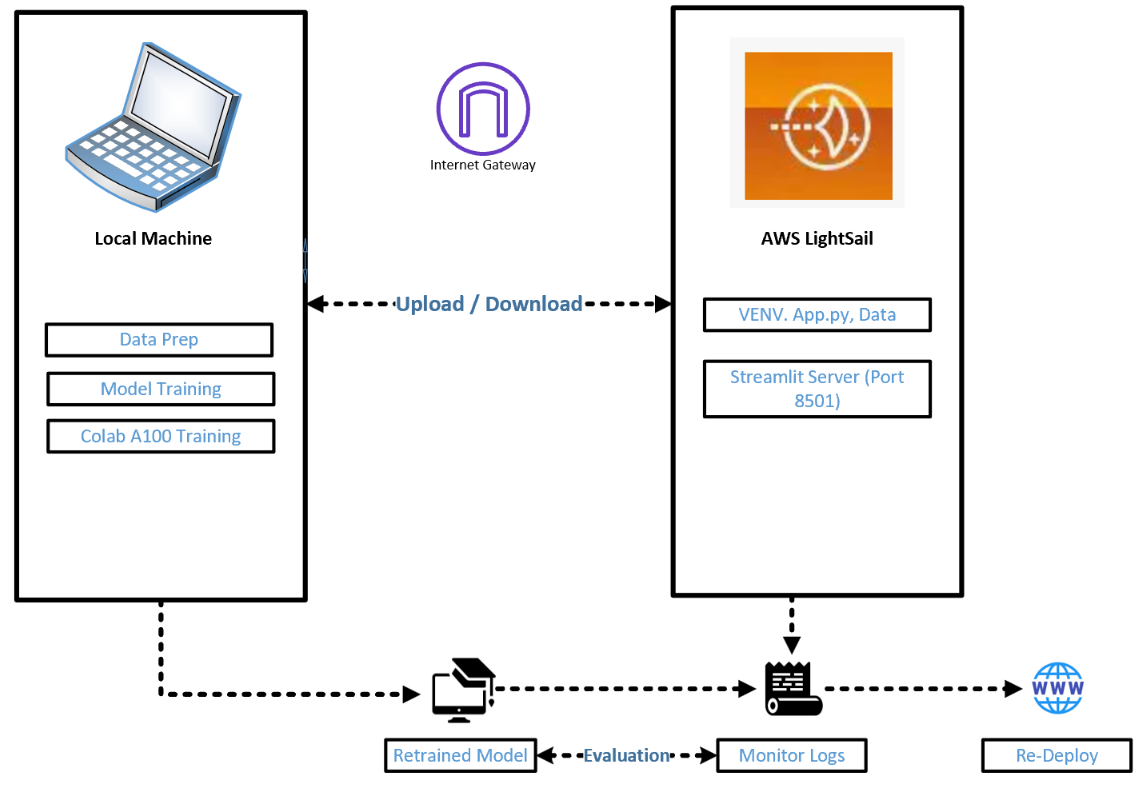

- **Local Development:** Prepares data and trains models offline.

- **SSH/FileZilla:** Facilitates secure file transfer to the instance.

- **AWS Lightsail Instance:** Hosts both applications, with separate ports for Streamlit servers and local storage for data and models.

- **Retrained Models:** Flow from evaluation to redeployment, monitored via logs.

#**Process and Understanding**

**Major Components, Inputs, and Outputs**

- **Components:** The system comprises a Local Development Environment (for training), an AWS Lightsail Instance (for deployment), and monitoring tools. The Brain Tumor Classifier processes MRI images, outputting classification labels and regional tumor probabilities. The SmartFleet Route Optimizer analyzes traffic and risk data, producing optimized routes and savings metrics.

- **Inputs:** MRI images (JPG/NPY) for Brain Tumor, and CSV/Excel files (crime, weather, traffic) for SmartFleet, sourced from local storage or uploads.

- **Outputs:** Classification reports (HTML via Streamlit) for Brain Tumor, and interactive maps/dashboards for SmartFleet.

#**Data Storage**

Data is stored in /home/ubuntu/BrainClassifier/Data/ and /home/ubuntu/smartfleet-app/Data/ on the Lightsail instance. Models (model.h5 for Brain Tumor, application.py weights for SmartFleet) reside in /home/ubuntu/BrainClassifier/Models/. Storage is local to the instance, with backups planned on Google Drive for redundancy.

#**Data Movement**

Data and models are transferred from the local machine to the instance via SSH/SCP or FileZilla. Within the instance, Streamlit serves processed outputs to users via HTTP on ports 8502 and 8501. New data for retraining is uploaded manually, triggering offline processing.

#**Model Lifecycle**

- **Retraining Frequency:** Every 6 months or when accuracy drops below 85% (e.g., via manual validation), based on new MRI or traffic data availability.

- **Retraining Data:** Requires updated MRI scans (Brain Tumor) or traffic/crime datasets (SmartFleet), stored temporarily on Google Drive, then transferred to the instance.

- **Evaluation:** Retrained models are validated offline on Colab with a held-out test set (20% of data), using metrics like accuracy (Brain Tumor) and route efficiency (SmartFleet).

- **Deployment:** Updated models are uploaded via FileZilla, and the instance is restarted with nohup to apply changes. Storage as Artifact: Retrained models are saved as .h5 (Brain Tumor) or updated Python scripts (SmartFleet), archived with version numbers (e.g., model_v2.h5) on Google Drive.

#**Monitoring and Debugging**

 The system is monitored via nohup.out logs, checked daily for errors or performance drops. A custom script will flag anomalies (e.g., >5% error rate), with plans to integrate AWS CloudWatch for real-time metrics. Debugging involves SSH access to review logs and adjust configurations.

#**Tools and Technologies**

- **Development:** Python 3.10, TensorFlow, Pandas, Matplotlib, Folium, Streamlit. Cloud: AWS Lightsail (4GB instance), Google Colab (A100 GPUs for training).

- **Transfer:** SSH, FileZilla, SCP.

- **Monitoring:** Basic log analysis, planned CloudWatch integration.

#**Estimated Implementation Cost**

- **Resources:** 4GB Lightsail instance, sufficient for current load (estimated 2GB usage).

- **Time:** Initial deployment took 4 hours; maintenance (monitoring, retraining) estimates 2 hours/month.

- **Money:**  10/monthforLightsail, 0 for Colab (free tier), totaling $120/year, scalable with usage.